In [ ]:
import pandas as pd
MOTTweetsdf = pd.read_csv(r"extracted_Tweets_with_ID.csv", 
names=["id","user", "verifiedusers", "text", "source", "place", "TweetSource","created_at","retweetCount","Likes"])

In [ ]:
MOTTweetsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  float64
 1   user           10000 non-null  object 
 2   verifiedusers  10000 non-null  bool   
 3   text           10000 non-null  object 
 4   source         16 non-null     object 
 5   place          5142 non-null   object 
 6   TweetSource    10000 non-null  object 
 7   created_at     10000 non-null  object 
 8   retweetCount   10000 non-null  int64  
 9   Likes          10000 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 713.0+ KB


In [ ]:
MOTTweetsdf['text'][10]

"RT @thebradfordfile: LOL. Biden's ministry of truth is producing more disinformation than CNN."

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
sentence = MOTTweetsdf['text'][10]
sid.polarity_scores(sentence)['compound']

0.7034

In [ ]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet)
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) 
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ")
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet

In [ ]:
MOTTweetsdf['tweet_clean'] = MOTTweetsdf['text'].apply(cleaner)

In [ ]:
list1 = []
for i in MOTTweetsdf['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [ ]:
MOTTweetsdf['sentiment'] = pd.Series(list1)

In [ ]:
def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

MOTTweetsdf['sentiment_category'] = MOTTweetsdf['sentiment'].apply(sentiment_category)

In [ ]:
MOTTweetsdf.head()

,id,user,verifiedusers,text,source,place,TweetSource,created_at,retweetCount,Likes,tweet_clean,sentiment,sentiment_category
0,1.520000e+18,KafkaVive,False,RT @thebradfordfile: I wonder how many people ...,NaN,NaN,Twitter Web App,2022-04-29 01:57:27+00:00,5,0,: I wonder how many people Musk will go to wor...,0.3182,positive
1,1.520000e+18,Greek567Phoenix,False,@DoItCoward69 @ParkerMolloy @elonmusk Wonder w...,NaN,NaN,Twitter Web App,2022-04-29 01:57:23+00:00,0,0,"Wonder why that is , 2 , create a new agency ....",0.5267,positive
2,1.520000e+18,QcCeeBee,False,RT @AwakenWithJP: The Ministry of Truth - Ever...,NaN,Ville de Lorraine au Québec,Twitter Web App,2022-04-29 01:57:22+00:00,89,0,: The Ministry of Truth - Everything You Need ...,0.3802,positive
3,1.520000e+18,1ChicagoDave,False,"@RepThomasMassie @RepBoebert Oh, just call it ...",NaN,"Knoxville, TN",Twitter for iPhone,2022-04-29 01:57:20+00:00,0,0,"Oh , just call it what it is : ’ s Ministry of...",0.3182,positive
4,1.520000e+18,VoterToni,False,RT @thebradfordfile: I wonder how many people ...,NaN,NaN,Twitter for iPhone,2022-04-29 01:57:20+00:00,5,0,: I wonder how many people Musk will go to wor...,0.3182,positive


In [ ]:
MOTTweetsdf.drop(MOTTweetsdf[MOTTweetsdf['text'] == "text"].index, inplace = True)
MOTTweetsdf.head()

,id,user,verifiedusers,text,source,place,TweetSource,created_at,retweetCount,Likes,tweet_clean,sentiment,sentiment_category
0,1.520000e+18,KafkaVive,False,RT @thebradfordfile: I wonder how many people ...,NaN,NaN,Twitter Web App,2022-04-29 01:57:27+00:00,5,0,: I wonder how many people Musk will go to wor...,0.3182,positive
1,1.520000e+18,Greek567Phoenix,False,@DoItCoward69 @ParkerMolloy @elonmusk Wonder w...,NaN,NaN,Twitter Web App,2022-04-29 01:57:23+00:00,0,0,"Wonder why that is , 2 , create a new agency ....",0.5267,positive
2,1.520000e+18,QcCeeBee,False,RT @AwakenWithJP: The Ministry of Truth - Ever...,NaN,Ville de Lorraine au Québec,Twitter Web App,2022-04-29 01:57:22+00:00,89,0,: The Ministry of Truth - Everything You Need ...,0.3802,positive
3,1.520000e+18,1ChicagoDave,False,"@RepThomasMassie @RepBoebert Oh, just call it ...",NaN,"Knoxville, TN",Twitter for iPhone,2022-04-29 01:57:20+00:00,0,0,"Oh , just call it what it is : ’ s Ministry of...",0.3182,positive
4,1.520000e+18,VoterToni,False,RT @thebradfordfile: I wonder how many people ...,NaN,NaN,Twitter for iPhone,2022-04-29 01:57:20+00:00,5,0,: I wonder how many people Musk will go to wor...,0.3182,positive


In [ ]:
MOT_sentiments_counts = MOTTweetsdf['sentiment_category'].value_counts(dropna=True, sort=True)
MOT_sentiments_reset = MOT_sentiments_counts.reset_index()
MOT_sentiments_reset.columns = ['source', 'counts'] # change column names

print(MOT_sentiments_reset)

     source  counts
0  positive    5005
1  negative    3898
2   neutral    1097


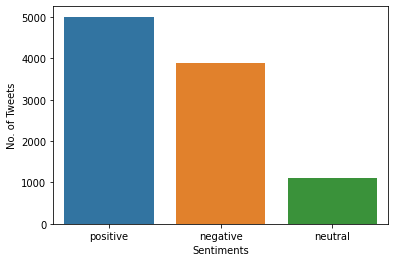

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'source',y = 'counts',data = MOT_sentiments_reset)
plt.xlabel('Sentiments')
plt.ylabel('No. of Tweets')
plt.show()


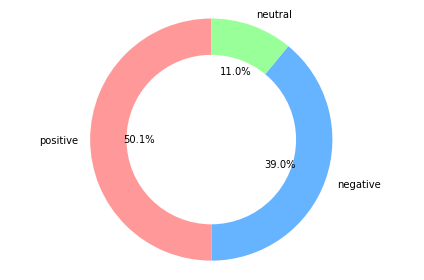

In [ ]:
import matplotlib.pyplot as plt
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(MOT_sentiments_reset['counts'], colors = colors, labels=MOT_sentiments_reset['source'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

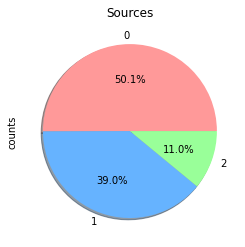

In [ ]:
colors = ['#ff9999','#66b3ff','#99ff99']
plot = df_value_counts_reset.plot.pie(y='counts', title="Sources", legend=False,                    
                                               autopct='%1.1f%%', shadow=True, startangle=0, colors = colors )

In [ ]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['created_at'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['created_at'],as_index=False).count()

pos = pos[['created_at','retweetCount']]
neg = neg[['created_at','retweetCount']]

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['created_at'], y=pos['retweetCount'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['created_at'], y=neg['retweetCount'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

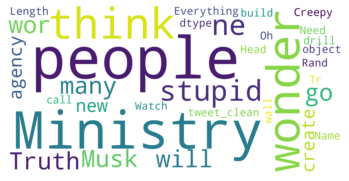

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive = MOTTweetsdf[MOTTweetsdf['sentiment_category']=='positive']
wordcloud = WordCloud(max_words=2000, width = 1600 , height = 800, background_color="white", collocations=False).generate(str(positive['tweet_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


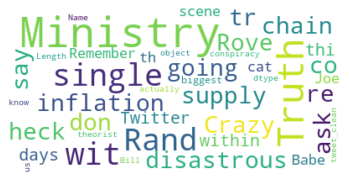

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
negative = MOTTweetsdf[MOTTweetsdf['sentiment_category']=='negative']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(negative['tweet_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


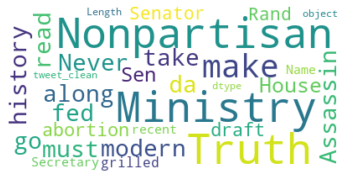

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
neutral = MOTTweetsdf[MOTTweetsdf['sentiment_category']=='neutral']
wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(str(neutral['tweet_clean']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()